In [1]:
from google.colab import files
uploaded = files.upload()

Saving news_headlines_train.csv to news_headlines_train (2).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv("news_headlines_train.csv")
df.head()

,text,sentiment
0,"In addition , a further 29 employees can be la...",-1
1,The authorisation is in force until the end of...,0
2,The value of the deal was not disclosed .,0
3,You need to be ready when the window opens up ...,0
4,Major Order in India Comptel Corporation has r...,1


In [4]:
df.shape

(3193, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3193 non-null   object
 1   sentiment  3193 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.0+ KB


In [6]:
df.describe()

,sentiment
count,3193.000000
mean,0.163169
std,0.615686
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Drop duplicates in text

In [7]:
df.drop_duplicates(subset=['text'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 3192
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3189 non-null   object
 1   sentiment  3189 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 74.7+ KB


Count number of each sentiment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

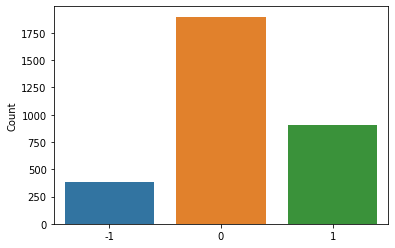

In [101]:
count = df['sentiment'].value_counts()
sns.barplot(count.index,count)
plt.gca().set_ylabel('Count')

In [102]:
# Getting exact counts
df.sentiment.value_counts()

 0    1898
 1     908
-1     387
Name: sentiment, dtype: int64

Import Simple Transformers library

In [12]:
!pip install simpletransformers

Relabel negative sentiment (-1) to 2

In [13]:
def relabel(x):
    if (x == -1):
        return 2
    elif (x == 1):
        return 1
    elif (x == 0):
        return 0

df['sentiment'] = df['sentiment'].apply(relabel)

In [14]:
train_df = pd.DataFrame({
    'text': df['text'].replace(r'\n', ' ', regex=True),
    'sentiment': df['sentiment']
})

print(train_df.shape)


(3189, 2)


In [15]:
df.head()

,text,sentiment
0,"In addition , a further 29 employees can be la...",2
1,The authorisation is in force until the end of...,0
2,The value of the deal was not disclosed .,0
3,You need to be ready when the window opens up ...,0
4,Major Order in India Comptel Corporation has r...,1


# Model 1: BERT Model

number of epoches: 3

In [16]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs':3},use_cuda=False)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

In [17]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(1197, 0.3541604173217014)

In [18]:
from google.colab import files
uploaded = files.upload()

Saving news_headlines_test_sample_submission.csv to news_headlines_test_sample_submission (1).csv


In [29]:
test_df = pd.read_csv("news_headlines_test_sample_submission.csv", index_col=0)

In [22]:
result, model_outputs, wrong_predictions = model.eval_model(test_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:851: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [23]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

Relabel negative sentiments back to -1

In [33]:
import math

def relabel_back(x):
    if (x == 2):
        return -1
    elif (x == 1):
        return 1
    elif (x == 0):
        return 0

test_df['sentiment'] = test_df['sentiment'].apply(relabel_back)

In [31]:
predicted = lst
test_df['sentiment'] = predicted

In [34]:
test_df

,sentiment
text,
"Proline Plus is available in both adjustable single and multichannel models and fixed volume single-channel models , in volume ranges from 0.1 micro litres to 10 ml .",0
"Digia said its consolidated net sales for January-June 2010 were EUR67 .8 m , up 9.7 % on the same period in 2009 ( EUR61 .9 m ) .",1
Cash flow from operating activities is estimated to be positive .,1
11 August 2010 - Finnish measuring equipment maker Vaisala Oyj HEL : VAIAS said today that its net loss widened to EUR4 .8 m in the first half of 2010 from EUR2 .3 m in the corresponding period a year earlier .,1
"Metso Foundries Jyvaskyla Oy will discontinue production on this line by 30 September 2008 , the company said .",0
...,...
"`` In terms of profitability and earnings 2007 was the best year in our history , '' Chief Executive Veli-Matti Mattila said .",1
` Nordic infrastructure construction is one of our strategic growth areas .,1
"More than 14,000 customers were left powerless .",-1


In [36]:
test_df.to_csv("submission1_try3.csv")

# Model 2: XLNet

In [37]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('xlnet', 'xlnet-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs':1},use_cuda=False)

/usr/local/lib/python3.6/dist-packages/transformers/configuration_xlnet.py:212: FutureWarning: This config doesn't use attention memories, a core feature of XLNet. Consider setting `mem_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237
  FutureWarning,
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForSeque

In [39]:
train_df2 = pd.DataFrame({
    'text': df['text'].replace(r'\n', ' ', regex=True),
    'sentiment': df['sentiment']
})


In [40]:
model.train_model(train_df2)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(399, 0.5455924457307896)

In [48]:
test_df2 = pd.read_csv("news_headlines_test_sample_submission.csv", index_col=0)

In [42]:
result, model_outputs, wrong_predictions = model.eval_model(test_df2)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:851: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [45]:
lst2 = []
for arr in model_outputs:
    lst2.append(np.argmax(arr))

In [49]:
predicted = lst2
test_df2['sentiment'] = predicted

In [90]:
import math

def relabel_back(x):
    if (x == 2):
        return -1
    elif (x == 1):
        return 1
    elif (x == 0):
        return 0

test_df2['sentiment'] = test_df2['sentiment'].apply(relabel_back)

In [91]:
test_df2

,sentiment
text,
"Proline Plus is available in both adjustable single and multichannel models and fixed volume single-channel models , in volume ranges from 0.1 micro litres to 10 ml .",0
"Digia said its consolidated net sales for January-June 2010 were EUR67 .8 m , up 9.7 % on the same period in 2009 ( EUR61 .9 m ) .",1
Cash flow from operating activities is estimated to be positive .,1
11 August 2010 - Finnish measuring equipment maker Vaisala Oyj HEL : VAIAS said today that its net loss widened to EUR4 .8 m in the first half of 2010 from EUR2 .3 m in the corresponding period a year earlier .,1
"Metso Foundries Jyvaskyla Oy will discontinue production on this line by 30 September 2008 , the company said .",0
...,...
"`` In terms of profitability and earnings 2007 was the best year in our history , '' Chief Executive Veli-Matti Mattila said .",1
` Nordic infrastructure construction is one of our strategic growth areas .,0
"More than 14,000 customers were left powerless .",-1


In [92]:
test_df2.to_csv("submission2.csv")

# Model 3: XLM

In [59]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('xlm', 'xlm-mlm-ende-1024', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs':1},use_cuda=False)

Some weights of the model checkpoint at xlm-mlm-ende-1024 were not used when initializing XLMForSequenceClassification: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing XLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMForSequenceClassification were not initialized from the model checkpoint at xlm-mlm-ende-1024 and are newly initialized: ['transformer.position_ids', 'sequence_summary.summary.weight', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and i

In [60]:
train_df3 = pd.DataFrame({
    'text': df['text'].replace(r'\n', ' ', regex=True),
    'sentiment': df['sentiment']
})


In [61]:
model.train_model(train_df3)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:353: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(399, 0.8898424674245647)

In [70]:
test_df3 = pd.read_csv("news_headlines_test_sample_submission.csv", index_col=0)

In [63]:
result, model_outputs, wrong_predictions = model.eval_model(test_df3)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:851: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [84]:
lst3 = []
for arr in model_outputs:
    lst3.append(np.argmax(arr))

In [86]:
predicted = lst3
test_df3['sentiment'] = predicted

In [93]:
import math

def relabel_back(x):
    if (x == 2):
        return -1
    elif (x == 1):
        return 1
    elif (x == 0):
        return 0

test_df3['sentiment'] = test_df3['sentiment'].apply(relabel_back)

In [94]:
test_df3.to_csv("submission3.csv")